Using TensorFlow backend.


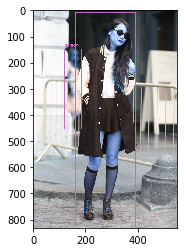

In [2]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
im = cv2.imread('C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\0001.jpg')
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()

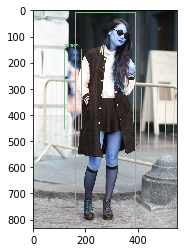

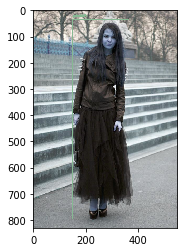

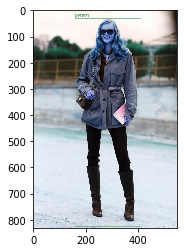

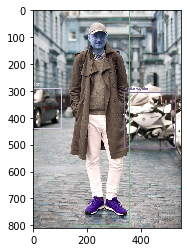

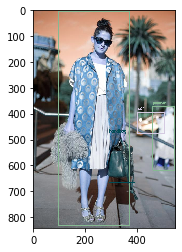

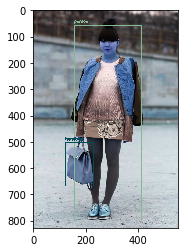

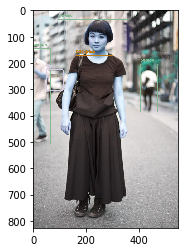

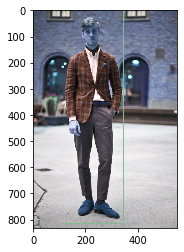

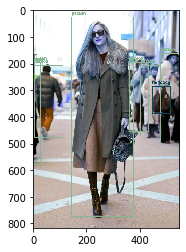

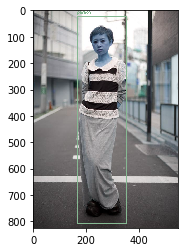

In [191]:
import glob

file_list = glob.glob('C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\*')[:10]

box_dict = {}
for idx, file in enumerate(file_list):
    im = cv2.imread(file)
    bbox, label, conf = cv.detect_common_objects(im)
    box_dict[idx] = [bbox, label, conf]
    output_image = draw_bbox(im, bbox, label, conf)
    plt.imshow(output_image)
    plt.show()

In [192]:
box_dict

{0: [[[161, 8, 391, 828], [120, 148, 186, 454]],
  ['person', 'person'],
  [0.9990715980529785, 0.8095126748085022]],
 1: [[[150, 35, 364, 795]], ['person'], [0.9996786713600159]],
 2: [[[160, 33, 412, 825]], ['person'], [0.9991716742515564]],
 3: [[[137, -12, 357, 800], [0, 290, 106, 440], [340, 306, 530, 510]],
  ['person', 'car', 'motorcycle'],
  [0.9990547895431519, 0.9754201173782349, 0.9660590887069702]],
 4: [[[98, 6, 372, 832],
   [460, 372, 544, 618],
   [402, 394, 504, 478],
   [292, 482, 392, 666]],
  ['person', 'person', 'car', 'handbag'],
  [0.9981585741043091,
   0.9856418371200562,
   0.9611395597457886,
   0.6574848294258118]],
 5: [[[156, 57, 412, 797], [122, 504, 230, 668]],
  ['person', 'handbag'],
  [0.9995930194854736, 0.9755069017410278]],
 6: [[[94, 36, 364, 810],
   [407, 204, 473, 386],
   [0, 145, 66, 507],
   [50, 226, 114, 304],
   [163, 171, 303, 375]],
  ['person', 'person', 'person', 'car', 'backpack'],
  [0.9998928308486938,
   0.9978936314582825,
   0.9

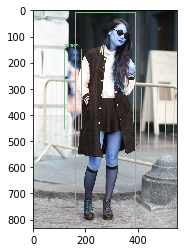

In [63]:
file = file_list[0]
im = cv2.imread(file)
bbox, label, conf = cv.detect_common_objects(im)
output_image = draw_bbox(im, bbox, label, conf)
plt.imshow(output_image)
plt.show()

In [64]:
bbox

[[161, 8, 391, 828], [120, 148, 186, 454]]

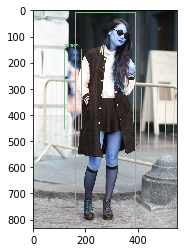

In [65]:
plt.imshow(draw_bbox(cv2.imread(file_list[0]), bbox, label, conf))

In [67]:
bbox[0]

[161, 8, 391, 828]

In [68]:
file_list[0]

'C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\0001.jpg'

In [4]:
import PIL.Image as pilimg
import numpy as np

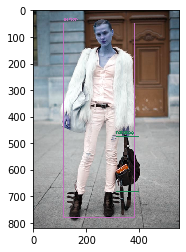

In [29]:
# Read image
num = '0799'
im2 = cv2.imread('C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\'+num+'.jpg')
bbox, label, conf = cv.detect_common_objects(im2)
output_image = draw_bbox(im2, bbox, label, conf)
plt.imshow(output_image)
plt.show()
# Display image
# im.show()
 
# Fetch image pixel data to numpy array
im = pilimg.open('C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\'+num+'.jpg')
pix = np.array(im)

In [30]:
print(bbox)
print(label)

[[114, 48, 378, 780], [310, 474, 396, 680]]
['person', 'handbag']


In [31]:
label.index('person')

0

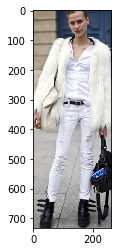

In [32]:
plt.imshow(pix[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]])

In [134]:
# np.unique(pix)

In [56]:
# c = np.array([[130, 140, 150],[130, 140, 150],[254,254,254],[130, 140, 150]])

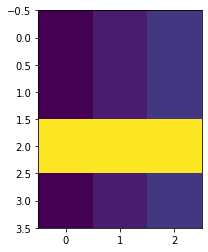

In [57]:
# plt.imshow(c)

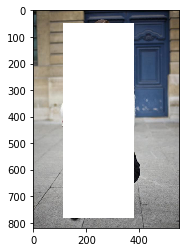

In [33]:
cloth = pix.copy()[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]]
pix[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]] = -1
plt.imshow(pix)

In [186]:
pix

array([[[157, 159, 148],
        [154, 156, 145],
        [152, 154, 143],
        ...,
        [ 85,  81,  70],
        [ 84,  80,  69],
        [ 84,  80,  69]],

       [[143, 144, 136],
        [139, 141, 130],
        [136, 137, 129],
        ...,
        [ 82,  78,  67],
        [ 81,  77,  66],
        [ 80,  76,  65]],

       [[133, 134, 128],
        [128, 129, 121],
        [124, 125, 119],
        ...,
        [ 76,  72,  61],
        [ 76,  72,  61],
        [ 75,  71,  60]],

       ...,

       [[ 84,  83,  81],
        [ 85,  84,  82],
        [ 85,  84,  82],
        ...,
        [ 88,  87,  85],
        [ 76,  75,  73],
        [ 67,  66,  64]],

       [[ 84,  83,  81],
        [ 84,  83,  81],
        [ 85,  84,  82],
        ...,
        [ 78,  77,  75],
        [ 70,  69,  67],
        [ 66,  65,  63]],

       [[ 84,  83,  81],
        [ 85,  84,  82],
        [ 85,  84,  82],
        ...,
        [ 63,  62,  60],
        [ 66,  65,  63],
        [ 70,  69,  67]]

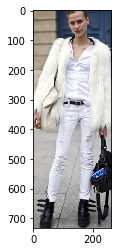

In [34]:
plt.imshow(cloth)

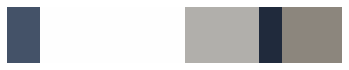

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans


def find_histogram(clt):
    """
    create a histogram with k clusters
    :param: clt
    :return:hist
    """
    numLabels = np.arange(0, len(np.unique(clt.labels_)) + 1)
    (hist, _) = np.histogram(clt.labels_, bins=numLabels)

    hist = hist.astype("float")
    hist /= hist.sum()

    return hist
def plot_colors2(hist, centroids):
    bar = np.zeros((50, 300, 3), dtype="uint8")
    startX = 0

    for (percent, color) in zip(hist, centroids):
        # plot the relative percentage of each cluster
        endX = startX + (percent * 300)
        cv2.rectangle(bar, (int(startX), 0), (int(endX), 50),
                      color.astype("uint8").tolist(), -1)
        startX = endX

    # return the bar chart
    return bar

# img = cv2.imread("pic/img7.jpeg")
# img = cv2.cvtColor(cloth, cv2.COLOR_BGR2RGB)
img = pix.copy()

img = img.reshape((img.shape[0] * img.shape[1],3)) #represent as row*column,channel number
clt = KMeans(n_clusters=5) #cluster number
clt.fit(img)

hist = find_histogram(clt)
bar = plot_colors2(hist, clt.cluster_centers_)

plt.axis("off")
plt.imshow(bar)
plt.show()

In [62]:
# from PIL import Image

clt.cluster_centers_

array([[ 68.61608023,  82.77057651, 104.33410698],
       [254.95166703, 254.95193549, 254.94641659],
       [177.0830518 , 175.33173167, 171.15025214],
       [ 32.68583015,  42.21909079,  60.55916031],
       [140.41795792, 134.82180693, 125.72790842]])

In [175]:
# plt.imshow(cv2.cvtColor(bar, cv2.COLOR_BGR2RGB))

In [100]:
# bar[bar==[164]]

In [101]:
# np.unique(bar)

In [102]:
# np.unique(pix)

In [167]:
# plt.imshow(pix)

In [104]:
# pix[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]]